In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
resume=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/UpdatedResumeDataSet.csv")
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
resume.groupby("Category").count()

,Resume
Category,
Advocate,20
Arts,36
Automation Testing,26
Blockchain,40
Business Analyst,28
Civil Engineer,24
Data Science,40
Database,33
DevOps Engineer,55


In [ ]:
resume["cleaned_resume"]=""
resume.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


<Axes: xlabel='count', ylabel='Category'>

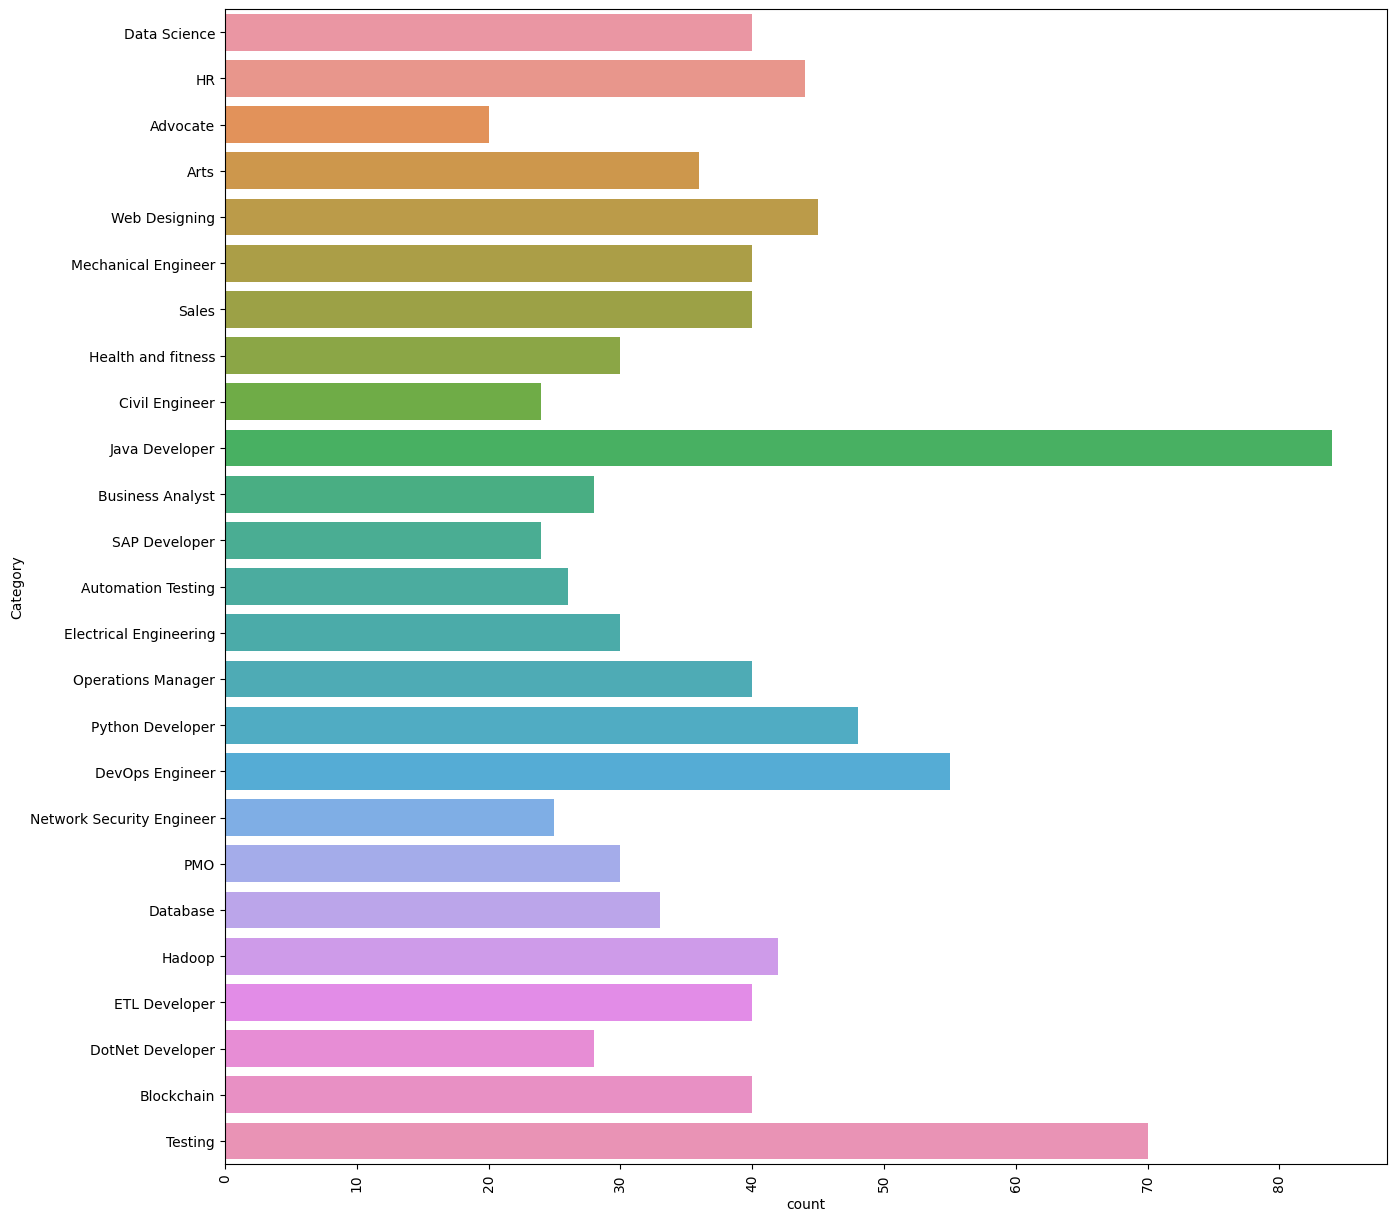

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resume)

In [ ]:
import re
#Regular Expression

In [ ]:
#Function for removing urls, hashtags, mentions, special letters, and punctuations which are present in dataset
def resume_clean(resume_data):
  resume_data=re.sub("http\S+\s*", " ", resume_data)
  resume_data=re.sub("RT|cc", " ", resume_data)
  resume_data=re.sub("#\S+", "", resume_data)
  resume_data=re.sub("@\S+", "  ", resume_data)
  resume_data=re.sub("[%s]" % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), " ", resume_data)
  resume_data=re.sub(r"[^\x00-\x7f]",r" ", resume_data)
  resume_data=re.sub("\s+", " ", resume_data)
  return resume_data

In [ ]:
resume["cleaned_resume"]=resume.Resume.apply(lambda x: resume_clean(x))

In [ ]:
resume.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
my_list=resume["cleaned_resume"].tolist()
# my_list

In [ ]:
para=" ".join(my_list)
# para

In [ ]:
split_words=para.split()
# split_words

In [ ]:
len(split_words)

412242

In [ ]:
tokens=word_tokenize(para)

In [ ]:
len(tokens)

412242

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords=stopwords.words("english")
# english_stopwords

In [ ]:
clean_token=[token for token in tokens if token not in english_stopwords]

In [ ]:
len(clean_token)

326070

In [ ]:
#punctuation removal
from string import punctuation

In [ ]:
clean_token=[token for token in clean_token if token not in punctuation]
len(clean_token)

326070

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:
clean_token=[lemmatizer.lemmatize(token) for token in clean_token]
clean_token=[lemmatizer.lemmatize(token,"v") for token in clean_token]
clean_token=[lemmatizer.lemmatize(token,"n") for token in clean_token]

In [ ]:
len(clean_token)

326070

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pos_token1=nltk.pos_tag(clean_token)

In [ ]:
# for element in pos_token1:
#   if element[1] in ["NN","NNS","NNP","NNPS"]:
#     print(element[0])

#Named Entity Recognition(NER)

In [ ]:
import spacy

In [ ]:
model=spacy.load("en_core_web_sm")
model.max_length=2500000

In [ ]:
clean_document1=" ".join(clean_token)
#print(clean_document1)
len(clean_document1)

2398354

In [ ]:
result=model(clean_document1)

In [ ]:
# result

In [ ]:
# for entity in result.ents:
#   print(entity,entity.label_)

#Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=800,height=900,
             background_color="white",
             min_font_size=10)

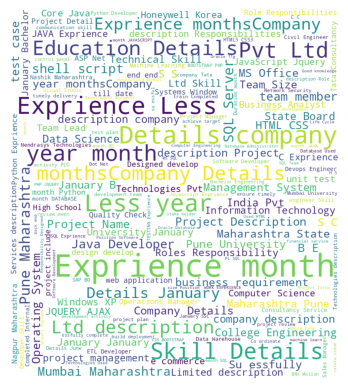

In [ ]:
wc.generate(clean_document1)
plt.imshow(wc)
plt.axis("off")
plt.show()

#Training and Testing the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=resume["cleaned_resume"]
y=resume["Category"]

In [ ]:
#Converting the dependent variable into categorical data
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
y=le.fit_transform(resume["Category"])

In [ ]:
resume.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

#Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
token=Tokenizer()
token.fit_on_texts(xtrain)

In [ ]:
vocabulary=token.word_index
print(vocabulary)

{'and': 1, 'the': 2, 'of': 3, 'to': 4, 'in': 5, 'for': 6, 'exprience': 7, 'with': 8, 'project': 9, 'a': 10, 'company': 11, 'months': 12, 'description': 13, 'details': 14, 'on': 15, 'as': 16, 'data': 17, '1': 18, 'management': 19, 'team': 20, 's': 21, 'is': 22, 'system': 23, '6': 24, 'maharashtra': 25, 'database': 26, 'testing': 27, 'year': 28, 'from': 29, 'development': 30, 'business': 31, 'than': 32, 'test': 33, 'all': 34, 'sql': 35, 'by': 36, 'less': 37, 'using': 38, 'ltd': 39, 'java': 40, 'client': 41, 'skill': 42, 'developer': 43, 'january': 44, 'engineering': 45, 'application': 46, 'pune': 47, 'work': 48, 'c': 49, 'services': 50, 'skills': 51, 'software': 52, 'responsibilities': 53, 'pvt': 54, 'education': 55, 'reports': 56, 'process': 57, 'requirements': 58, 'it': 59, 'technologies': 60, 'that': 61, '2': 62, 'operations': 63, 'server': 64, 'design': 65, 'customer': 66, 'university': 67, 'india': 68, 'technical': 69, 'sales': 70, 'environment': 71, 'working': 72, 'monthscompany': 

In [ ]:
voc_len=len(vocabulary)
print(voc_len)

7557


#Token to Sequence

In [ ]:
train_seq = token.texts_to_sequences(xtrain)
print(train_seq)
# xtrain[0]

[[52, 51, 262, 49, 49, 40, 186, 110, 85, 371, 177, 1131, 982, 122, 35, 26, 169, 35, 958, 5264, 202, 140, 160, 413, 208, 150, 565, 513, 281, 2289, 439, 377, 428, 76, 64, 996, 1, 5265, 76, 50, 1063, 1, 2897, 109, 1496, 360, 102, 12, 29, 769, 1497, 246, 5266, 9, 1392, 2640, 3338, 627, 58, 5267, 230, 3, 1064, 1, 2213, 1763, 1, 1498, 5268, 5269, 583, 5270, 1393, 1044, 1946, 392, 141, 516, 55, 14, 62, 204, 179, 258, 725, 3339, 2640, 3338, 2, 2416, 383, 87, 383, 87, 3340, 42, 14, 40, 7, 1499, 12, 208, 7, 274, 12, 140, 7, 274, 12, 160, 7, 274, 12, 49, 7, 24, 73, 14, 11, 3340, 13, 90, 8, 15, 2984, 3, 193, 15, 383, 1819, 209, 1764, 1, 2751, 15, 1819, 692, 209, 1764, 1, 2751, 15, 692, 383, 5271, 193, 15, 692, 356, 23, 209, 726, 524, 5, 1820, 705, 5, 40, 5272, 378, 1, 15, 692, 16, 220, 1, 74, 196, 1235, 500, 5, 40, 377, 15, 61, 1, 475, 209, 846, 119, 1, 2051, 34, 500, 525, 2641, 74, 196, 525, 2641, 6, 3341, 1702, 4, 1266, 34, 733, 1765, 5, 383, 5273, 1766, 15, 692, 74, 196, 209, 96, 692, 46, 4, 12

In [ ]:
max_length=2064

In [ ]:
# train_seq = token.texts_to_sequences(xtrain)
from tensorflow.keras.preprocessing import sequence
train_matrix=sequence.pad_sequences(train_seq,maxlen=max_length)
print(train_matrix)

[[   0    0    0 ...  513 1948  513]
 [   0    0    0 ... 1088   20  494]
 [   0    0    0 ... 1949    5 4551]
 ...
 [   0    0    0 ... 1977 3850 3851]
 [   0    0    0 ...  123  887 1275]
 [   0    0    0 ...   15  378 5240]]


In [ ]:
#Test Data
test_seq=token.texts_to_sequences(xtest)
test_matrix=sequence.pad_sequences(test_seq,maxlen=max_length)
print(test_matrix)

[[   0    0    0 ...  804   70  106]
 [   0    0    0 ...    1  183   56]
 [   0    0    0 ...   97    5   20]
 ...
 [   0    0    0 ... 1050 1465  961]
 [   0    0    0 ...   11   16   43]
 [   0    0    0 ...  692  534  207]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten


In [ ]:
# Build and Train ANN Classifier
model = Sequential()
model.add(Embedding(voc_len + 1, 128, input_length=max_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))  # Output layer with softmax for multi-class classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_matrix, ytrain, epochs=5, batch_size=32)


Epoch 1/5
25/25 [==============================] - 9s 326ms/step - loss: 3.0677 - accuracy: 0.2445
Epoch 2/5
25/25 [==============================] - 6s 242ms/step - loss: 1.3512 - accuracy: 0.6528
Epoch 3/5
25/25 [==============================] - 8s 304ms/step - loss: 0.5034 - accuracy: 0.9311
Epoch 4/5
25/25 [==============================] - 4s 177ms/step - loss: 0.1830 - accuracy: 0.9831
Epoch 5/5
25/25 [==============================] - 6s 259ms/step - loss: 0.0646 - accuracy: 0.9961


In [ ]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(test_matrix, ytest)

print("Test Accuracy:", test_accuracy)



7/7 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9845
Test Accuracy: 0.984455943107605


In [ ]:
# Predictions
y_pred = model.predict(test_matrix)
y_pred_classes = y_pred.argmax(axis=-1)



7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report


In [ ]:

report = classification_report(ytest, y_pred_classes, target_names=le.classes_)
print("Classification Report:\n", report)

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00        13
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         5
          DevOps Engineer       1.00      0.90      0.95        10
         DotNet Developer       1.00      1.00      1.00         4
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        10
                   Hadoop       1.00 